In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium.vector_layers
import dash 
from dash import dcc,html

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,normalize
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeClassifier,plot_tree
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.shape

(1000, 12)

In [5]:
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [6]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [8]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

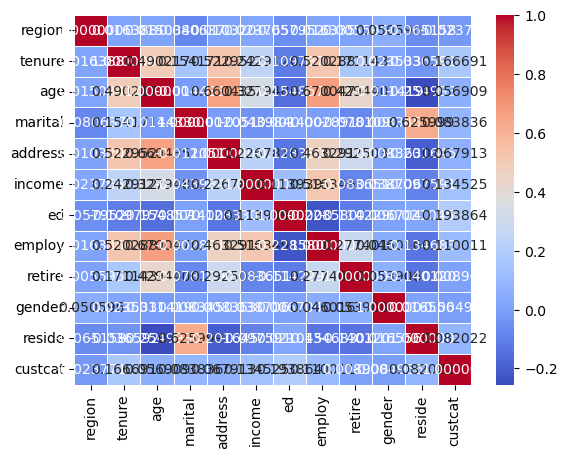

In [9]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='2f',linewidths=0.5)

In [10]:
correlation=df.corr()['custcat'].drop('custcat')
correlation

region    -0.023771
tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
retire     0.008908
gender    -0.004966
reside     0.082022
Name: custcat, dtype: float64

In [11]:
correlation=correlation.sort_values(ascending=False)
correlation

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64

In [12]:
correlation_values=abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [13]:
x=df.drop('custcat',axis=1)
y=df['custcat']

In [14]:
ss=StandardScaler()
x_norm=ss.fit_transform(x)
x_norm

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]], shape=(1000, 11))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=4)

In [16]:
k=4
knn_classifier=KNeighborsClassifier(n_neighbors=k)
knn_model=knn_classifier.fit(x_train,y_train)
knn_model


KNeighborsClassifier(n_neighbors=4)

In [17]:
yhat=knn_classifier.predict(x_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

In [18]:
yhat=knn_model.predict(x_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

In [19]:
print("Test set Accuracy:",accuracy_score(y_test,yhat))

Test set Accuracy: 0.32


In [20]:
k=6
k1=KNeighborsClassifier(n_neighbors=k)
k1

KNeighborsClassifier(n_neighbors=6)

In [21]:
k1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
yk6=k1.predict(x_test)
yk6

array([3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 2, 1, 2, 3, 1, 2, 2, 3, 2, 1, 1,
       4, 1, 2, 1, 4, 4, 2, 1, 2, 2, 2, 3, 3, 3, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 2, 1, 1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 4, 1, 1, 1, 4, 2, 4, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 4, 1, 1, 2, 4, 3, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 3,
       1, 3])

In [23]:
print("Test set Accuracy: ", accuracy_score(y_test, yk6))

Test set Accuracy:  0.31


In [24]:
Ks = 10
acc=np.zeros((Ks))
acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
std_acc=np.zeros((Ks))
std_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
for n in range(1,Ks+1):
    knn_model_n=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    yhat=knn_model_n.predict(x_test)
    acc[n-1]=accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

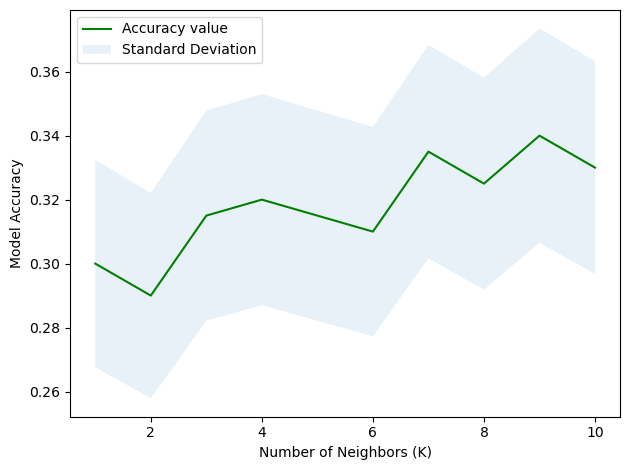

In [27]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc-1*std_acc,acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
print("The best accuracy was with",acc.max(),'with k=',acc.argmax()+1)

The best accuracy was with 0.34 with k= 9


In [29]:
Ks1=50
acc100=np.zeros((Ks1))
std_acc100=np.zeros((Ks1))
for i in range(1,Ks1+1):
    knn_model_n=KNeighborsClassifier(n_neighbors=i)
    knn_model_n.fit(x_train,y_train)
    yk100=knn_model_n.predict(x_test)
    acc100[n-1]=accuracy_score(y_test,yk100)
    std_acc100[n-1]=np.std(yk100==y_test)/np.sqrt(yk100.shape[0])


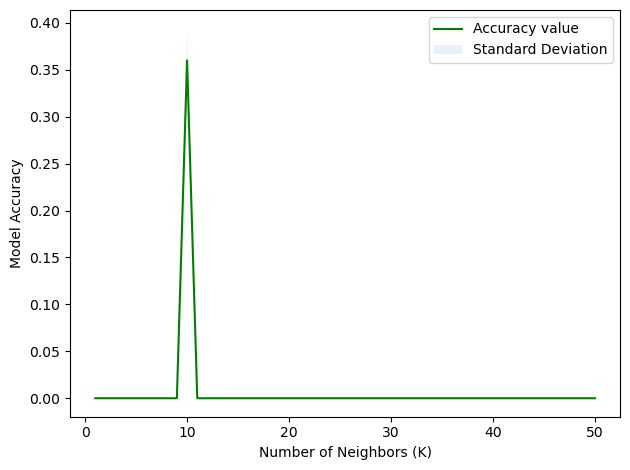

In [30]:
plt.plot(range(1,Ks1+1),acc100,'g')
plt.fill_between(range(1,Ks1+1),acc100 - 1 * std_acc100,acc100 + 1 * std_acc100, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [31]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.34 with k = 9
